Accuracy: 0.2314674735249622


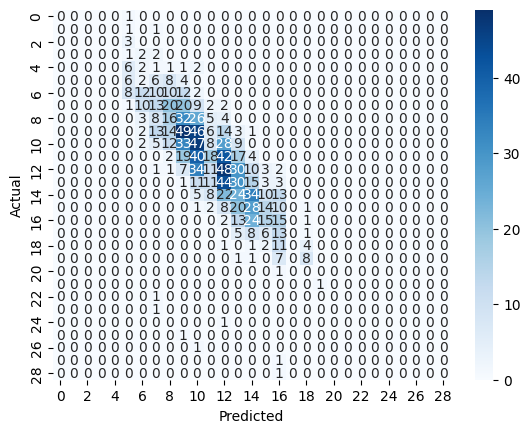

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def student_pass_fail_prediction():
    # Load dataset
    student_data = pd.read_csv('StudentPerformanceFactors.csv')

    # Selecting relevant columns
    student_data = student_data[['Hours_Studied', 'Attendance', 'Exam_Score']]

    # Preprocessing
    X = student_data[['Hours_Studied', 'Attendance']]
    y = student_data['Exam_Score']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Logistic Regression Model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {acc}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

student_pass_fail_prediction()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Accuracy: 0.9036544850498339


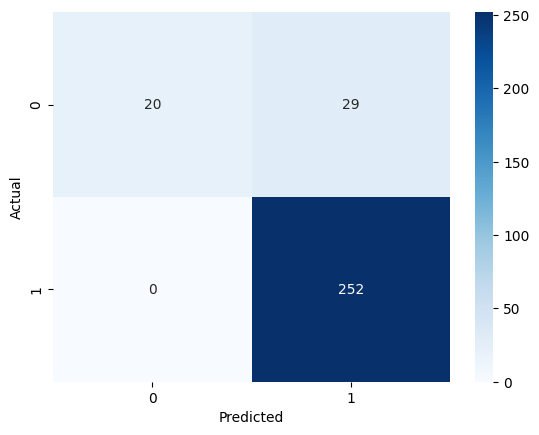

In [11]:
import nltk
def sentiment_analysis():
    # Load dataset
    reviews = pd.read_csv('European Restaurant Reviews.csv')

    # Text Preprocessing
    nltk.download('stopwords')
    nltk.download('punkt_tab')
    stop_words = set(stopwords.words('english'))

    def preprocess_text(text):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        words = word_tokenize(text)
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)

    reviews['Processed Review'] = reviews['Review'].apply(preprocess_text)

    # Text Vectorization
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(reviews['Processed Review'])
    y = reviews['Sentiment']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression Model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc}')

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

sentiment_analysis()